In [1]:
# +-----------------------------------------------------------------------------+
# | rMATS Graph, Written by Python
# | Optimized for GDL r400 rMATS script
# | maintainer: jinhokim.07@cau.ac.kr
# | Last Update: 24.04.19
# +-----------------------------------------------------------------------------+

# +---System Library Import-----------------------------------------------------+
import os, sys
# +---Basic Library Import------------------------------------------------------+
import numpy as np
import pandas as pd
# +---Graph Library Import------------------------------------------------------+
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
SetName = "CTLvsTRE1"
dir_route = "./400_AS/rMATS/TRE1/rmats_result/"
output_dir_route = "./410_AS_Plots/rMATS"

AS = ["SE", "A3SS", "A5SS", "RI", "MXE"]
pvalue_thres = 0.05

# Reference
gene_function_route = "./GRCz11_108_Ensembl/Gene_Function.bed"

In [164]:
REF = pd.read_csv(gene_function_route, sep = "\t", header = None)
REF.columns = ["GeneIDs", "GeneSym", "Function"]
REF_PC = REF.loc[REF["Function"] == "protein_coding"].reset_index(drop = True)
REF_PC.head()

,GeneIDs,GeneSym,Function
0,ENSDARG00000009657,fgfr1op2,protein_coding
1,ENSDARG00000096156,si:dkey-21h14.12,protein_coding
2,ENSDARG00000076160,si:dkey-285e18.2,protein_coding
3,ENSDARG00000117163,znf1114,protein_coding
4,ENSDARG00000096187,si:dkey-21h14.10,protein_coding


In [165]:
AS_DICT = {}
AS_Sig_DICT = {}
for as_type in AS:
    df = pd.read_csv(os.path.join(dir_route, as_type+".MATS.JCEC.txt"), sep = "\t")
    df_pc = df.loc[df["GeneID"].apply(lambda x: x in REF_PC["GeneIDs"].to_numpy())].reset_index(drop=True)
    AS_DICT[as_type] = df_pc
    
    df_pc_sig = df_pc.loc[df_pc["PValue"] < pvalue_thres].reset_index(drop=True).copy()
    AS_Sig_DICT[as_type] = df_pc_sig
    
    print(as_type, len(df_pc), len(df_pc_sig))

SE 7483 1190
A3SS 815 185
A5SS 469 96
RI 950 192
MXE 483 95


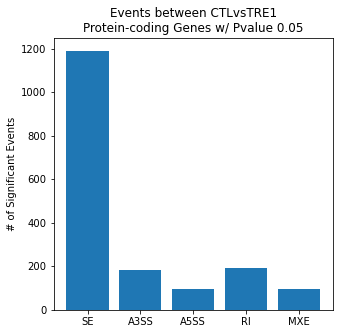

In [166]:
# Plot 1. # of Signigicant Events in Protein-coding genes

plt.figure(figsize=(5,5))

X = np.arange(len(AS))
Y = []
for as_type in AS:
    Y.append(len(AS_Sig_DICT[as_type]))

plt.bar(X, Y)
plt.xticks(X, AS)
  
plt.ylabel("# of Significant Events")
plt.title("Events between {}\nProtein-coding Genes w/ Pvalue {}".format(SetName,pvalue_thres))
plt.savefig(os.path.join(output_dir_route,"{}_{}.png".format(SetName, "PC_Sig_Events")))
plt.show()

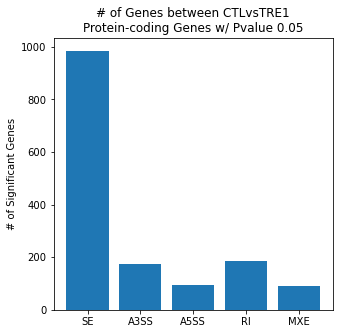

In [167]:
# Plot 2. # of Signigicant Genes

plt.figure(figsize=(5,5))

X = np.arange(len(AS))
Y = []
for as_type in AS:
    y = len(AS_Sig_DICT[as_type]["GeneID"].drop_duplicates())
    Y.append(y)

plt.bar(X, Y)
plt.xticks(X, AS)
  
plt.ylabel("# of Significant Genes")
plt.title("# of Genes between {}\nProtein-coding Genes w/ Pvalue {}".format(SetName,pvalue_thres))
plt.savefig(os.path.join(output_dir_route,"{}_{}.png".format(SetName, "PC_Sig_Genes")))
plt.show()

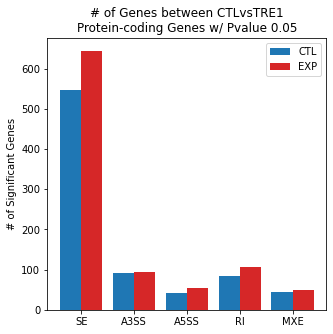

In [168]:
# Plot 3. # of Signigicant Genes, CTL/TRE

plt.figure(figsize=(5,5))

X = np.arange(len(AS))
Y_CTL = []
Y_EXP = []
for as_type in AS:  
    if (as_type != "RI"):
        tmp_ = AS_Sig_DICT[as_type]
        tmp_ctl_ = tmp_.loc[tmp_["IncLevelDifference"] < 0] # CTL Events
        Y_CTL.append(len(tmp_ctl_))
        tmp_exp_ = tmp_.loc[tmp_["IncLevelDifference"] > 0] # EXP Events
        Y_EXP.append(len(tmp_exp_))
    else:
        tmp_ = AS_Sig_DICT[as_type]
        tmp_ctl_ = tmp_.loc[tmp_["IncLevelDifference"] > 0] # CTL Events
        Y_CTL.append(len(tmp_ctl_))
        tmp_exp_ = tmp_.loc[tmp_["IncLevelDifference"] < 0] # EXP Events
        Y_EXP.append(len(tmp_exp_))

plt.bar(X-0.2, Y_CTL, width=0.4, label = "CTL", color = "tab:blue")
plt.bar(X+0.2, Y_EXP, width=0.4, label = "EXP", color = "tab:red")
plt.xticks(X, AS)
  
plt.ylabel("# of Significant Genes")
plt.title("# of Genes between {}\nProtein-coding Genes w/ Pvalue {}".format(SetName,pvalue_thres))
plt.legend()
plt.savefig(os.path.join(output_dir_route,"{}_{}.png".format(SetName, "PC_Sig_Events_Compare")))
plt.show()

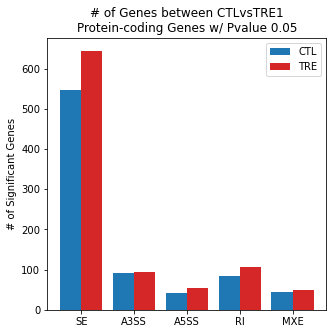

In [169]:
# Plot 3. # of Signigicant Genes, CTL/TRE

plt.figure(figsize=(5,5))

X = np.arange(len(AS))
Y_CTL = []
Y_EXP = []
for as_type in AS:  
    if (as_type != "RI"):
        tmp_ = AS_Sig_DICT[as_type]
        tmp_ctl_ = tmp_.loc[tmp_["IncLevelDifference"] < 0] # CTL Events
        Y_CTL.append(len(tmp_ctl_))
        tmp_exp_ = tmp_.loc[tmp_["IncLevelDifference"] > 0] # EXP Events
        Y_EXP.append(len(tmp_exp_))
    else:
        tmp_ = AS_Sig_DICT[as_type]
        tmp_ctl_ = tmp_.loc[tmp_["IncLevelDifference"] > 0] # CTL Events
        Y_CTL.append(len(tmp_ctl_))
        tmp_exp_ = tmp_.loc[tmp_["IncLevelDifference"] < 0] # EXP Events
        Y_EXP.append(len(tmp_exp_))

plt.bar(X-0.2, Y_CTL, width=0.4, label = "CTL", color = "tab:blue")
plt.bar(X+0.2, Y_EXP, width=0.4, label = "TRE", color = "tab:red")
plt.xticks(X, AS)
  
plt.ylabel("# of Significant Genes")
plt.title("# of Genes between {}\nProtein-coding Genes w/ Pvalue {}".format(SetName,pvalue_thres))
plt.legend()
plt.savefig(os.path.join(output_dir_route,"{}_{}.png".format(SetName, "PC_Sig_Genes_Compare")))
plt.show()